In [1]:
import os

data_dir = "data"
train_dir = os.path.join(data_dir, "train")
val_dir   = os.path.join(data_dir, "val")
test_dir  = os.path.join(data_dir, "test")

print(train_dir)
print(val_dir)
print(test_dir)

data\train
data\val
data\test


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
datagen_val = ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = datagen_train.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 6225 images belonging to 11 classes.


In [ ]:
val_data = datagen_val.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 1092 images belonging to 11 classes.


In [ ]:
test_data = datagen_test.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 3187 images belonging to 11 classes.


In [ ]:
print("✅ Classes:", train_data.class_indices)

✅ Classes: {'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(len(train_data.class_indices), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,247,499 (84.87 MB)

 Trainable params: 22,247,499 (84.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn = cnn_model.fit(train_data,
                            steps_per_epoch=len(train_data),
                            epochs=15,
                            validation_data=val_data,
                            validation_steps=len(val_data))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 5177s 27s/step - accuracy: 0.4083 - loss: 1.8120 - val_accuracy: 0.7262 - val_loss: 0.7594
Epoch 2/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 403ms/step - accuracy: 0.7672 - loss: 0.6487 - val_accuracy: 0.9130 - val_loss: 0.2811
Epoch 3/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 404ms/step - accuracy: 0.8794 - loss: 0.3590 - val_accuracy: 0.9011 - val_loss: 0.3006
Epoch 4/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 405ms/step - accuracy: 0.9074 - loss: 0.2816 - val_accuracy: 0.9670 - val_loss: 0.1496
Epoch 5/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 404ms/step - accuracy: 0.9353 - loss: 0.1899 - val_accuracy: 0.9615 - val_loss: 0.1718
Epoch 6/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 407ms/step - accuracy: 0.9472 - loss: 0.1598 - val_accuracy: 0.9615 - val_loss: 0.1628
Epoch 7/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 403ms/step - accuracy: 0.9639 - loss: 0.1198 - val_accuracy: 0.9716 - val_loss: 0.1155
Epoch 8/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 403ms/step - accuracy: 0.9716 - loss: 0

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(f'{title} Accuracy')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f'{title} Loss')
    plt.legend()
    plt.show()

In [ ]:
def show_and_save_confusion_matrix(y_true, y_pred, class_names, model_name, save_csv=True):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    if save_csv:
        cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
        cm_df.to_csv(f"/content/{model_name}_confusion_matrix.csv")
        print(f"✅ Saved {model_name}_confusion_matrix.csv")
    return cm

In [ ]:
def evaluate_and_report(model, test_data, model_name):
    # Get predictions
    y_true = test_data.classes
    y_pred = np.argmax(model.predict(test_data), axis=1)
    class_names = list(test_data.class_indices.keys())

    # Accuracy
    acc = np.mean(y_true == y_pred)
    print(f"\n📊 {model_name} Accuracy: {acc*100:.2f}%")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion matrix (simple numeric output)
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)

    return acc, cm

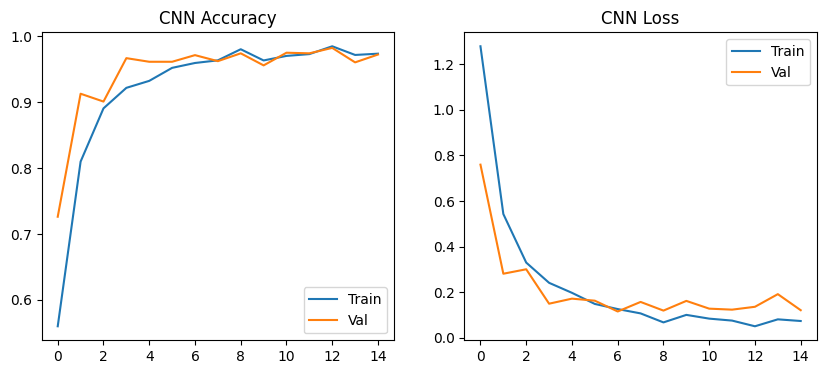

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2435s 25s/step

📊 CNN Accuracy: 97.68%

Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.98      0.98      0.98       520
                animal fish bass       0.67      0.15      0.25        13
   fish sea_food black_sea_sprat       0.93      1.00      0.96       298
   fish sea_food gilt_head_bream       0.97      0.97      0.97       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       0.97      1.00      0.98       291
     fish sea_food red_sea_bream       1.00      0.95      0.97       273
          fish sea_food sea_bass       0.97      0.98      0.97       327
            fish sea_food shrimp       0.99      1.00      1.00       289
fish sea_food striped_red_mullet       0.99      0.94      0.96       293
             fish sea_food trout       0.98      0.99      0.99       292

                  

In [ ]:
plot_history(history_cnn, "CNN")
acc_cnn, cm_cnn = evaluate_and_report(cnn_model, test_data, "CNN")

In [ ]:
cnn_model.save('cnn_fish_model.h5')
print("✅ Saved cnn_fish_model.h5")

import json
labels = list(train_data.class_indices.keys())
with open('class_labels.json', 'w') as f:
    json.dump(labels, f)
print("✅ Saved class_labels.json")

✅ Saved cnn_fish_model.h5
✅ Saved class_labels.json


In [ ]:
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
pretrained_models = {
'VGG16': VGG16,
'ResNet50': ResNet50,
'MobileNet': MobileNet,
'InceptionV3': InceptionV3,
'EfficientNetB0': EfficientNetB0
}

In [ ]:
from tensorflow.keras import layers

def build_tl_model(base_model_class, input_shape=(224,224,3), num_classes=len(train_data.class_indices)):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(512, activation='relu',)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
results = {'CNN': acc_cnn}
histories = {}

for name, model_fn in pretrained_models.items():
    print(f"\n🚀 Training {name} (base model frozen)...")
    model = build_tl_model(model_fn)

    # Stage 1: Train base model
    history = model.fit(train_data,steps_per_epoch=len(train_data),epochs=10,validation_data=val_data,validation_steps=len(val_data))
    histories[name] = history.history

    # Fine-tune
    print(f"🔧 Fine-tuning {name} (top layers unfrozen)...")
    for layer in model.layers[-50:]:
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    fine_tune_history = model.fit(train_data, validation_data=val_data, epochs=5)

    acc, cm = evaluate_and_report(model, test_data, f"{name}_FineTuned")
    results[f"{name}_FineTuned"] = acc
    model.save(f"/content/{name}_FineTuned_fish_model.h5")


🚀 Training VGG16 (base model frozen)...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 100s 465ms/step - accuracy: 0.4842 - loss: 1.6296 - val_accuracy: 0.8352 - val_loss: 0.6867
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 405ms/step - accuracy: 0.8370 - loss: 0.6218 - val_accuracy: 0.9020 - val_loss: 0.4052
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 406ms/step - accuracy: 0.8951 - loss: 0.3779 - val_accuracy: 0.9350 - val_loss: 0.2717
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 405ms/step - accuracy: 0.9218 - loss: 0.2835 - val_accuracy: 0.9487 - val_loss: 0.2016
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 407ms/step - accuracy: 0.9288 - loss: 0.2512 - val_accuracy: 0.9322 - val_loss: 0.2126
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 408ms/step - accuracy: 0.9448 - loss: 0.1927 - val_accuracy: 0.9441 - val_loss: 0.1744
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 406ms/step - accuracy: 0.9534 - loss: 0.1607 - val_accuracy: 0.9625 - val_los


📊 VGG16_FineTuned Accuracy: 99.81%

Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.99      1.00      0.99       520
                animal fish bass       0.82      0.69      0.75        13
   fish sea_food black_sea_sprat       1.00      1.00      1.00       298
   fish sea_food gilt_head_bream       1.00      1.00      1.00       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       1.00      1.00      1.00       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       1.00      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      1.00      1.00       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                  


📊 ResNet50_FineTuned Accuracy: 64.73%

Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.84      0.96      0.90       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.66      0.65      0.65       298
   fish sea_food gilt_head_bream       0.70      0.42      0.52       305
   fish sea_food hourse_mackerel       0.56      0.78      0.65       286
        fish sea_food red_mullet       0.59      0.47      0.52       291
     fish sea_food red_sea_bream       0.94      0.57      0.71       273
          fish sea_food sea_bass       0.51      0.56      0.53       327
            fish sea_food shrimp       0.54      0.95      0.69       289
fish sea_food striped_red_mullet       0.67      0.11      0.18       293
             fish sea_food trout       0.59      0.83      0.69       292

                        accuracy               


📊 MobileNet_FineTuned Accuracy: 98.74%

Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.99      0.99      0.99       520
                animal fish bass       1.00      0.77      0.87        13
   fish sea_food black_sea_sprat       1.00      0.94      0.97       298
   fish sea_food gilt_head_bream       1.00      0.99      0.99       305
   fish sea_food hourse_mackerel       1.00      0.99      0.99       286
        fish sea_food red_mullet       1.00      0.98      0.99       291
     fish sea_food red_sea_bream       0.99      1.00      0.99       273
          fish sea_food sea_bass       1.00      0.99      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.90      1.00      0.95       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy              


📊 InceptionV3_FineTuned Accuracy: 99.69%

Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       1.00      0.99      0.99       520
                animal fish bass       0.92      0.92      0.92        13
   fish sea_food black_sea_sprat       1.00      1.00      1.00       298
   fish sea_food gilt_head_bream       1.00      1.00      1.00       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       1.00      0.99      1.00       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       0.99      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.99      1.00      0.99       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy            

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 EfficientNetB0_FineTuned Accuracy: 16.32%

Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.16      1.00      0.28       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.00      0.00      0.00       292

                        accuracy         

In [38]:
# Comparison table
df_results = pd.DataFrame(list(results.items()), columns=['Model', 'TestAccuracy'])
df_results = df_results.sort_values(by='TestAccuracy', ascending=False)
df_results.to_csv('/content/model_comparison.csv', index=False)
print("✅ Saved model_comparison.csv")
print(df_results)

✅ Saved model_comparison.csv
                      Model  TestAccuracy
1           VGG16_FineTuned      0.998117
4     InceptionV3_FineTuned      0.996862
3       MobileNet_FineTuned      0.987449
0                       CNN      0.976781
2        ResNet50_FineTuned      0.647317
5  EfficientNetB0_FineTuned      0.163163


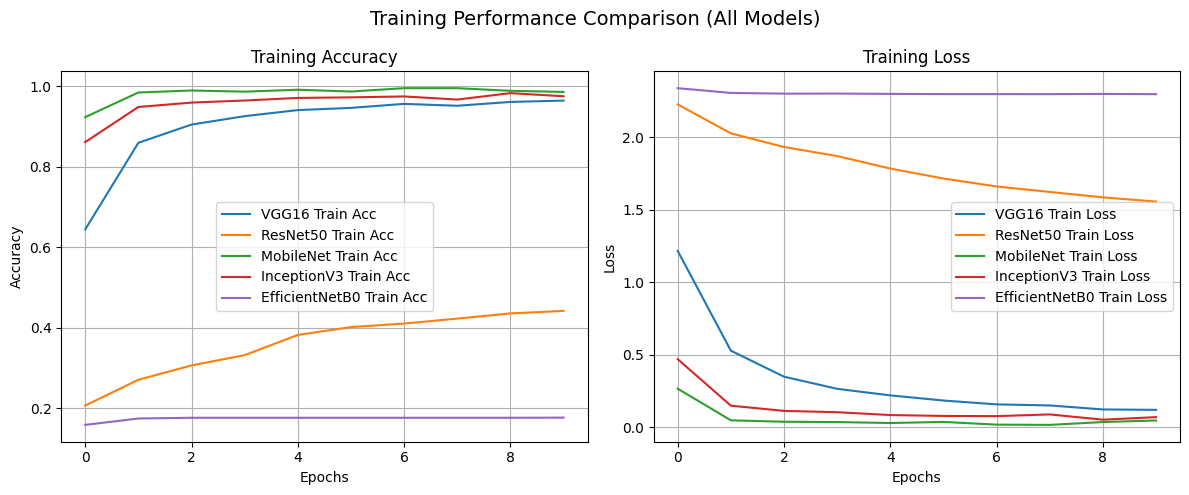

In [32]:
plt.figure(figsize=(12,5))

# Training Accuracy
plt.subplot(1,2,1)
for name, history in histories.items():
    plt.plot(history['accuracy'], label=f'{name} Train Acc')
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Training Loss
plt.subplot(1,2,2)
for name, history in histories.items():
    plt.plot(history['loss'], label=f'{name} Train Loss')
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.suptitle("Training Performance Comparison (All Models)", fontsize=14)
plt.tight_layout()
plt.show()

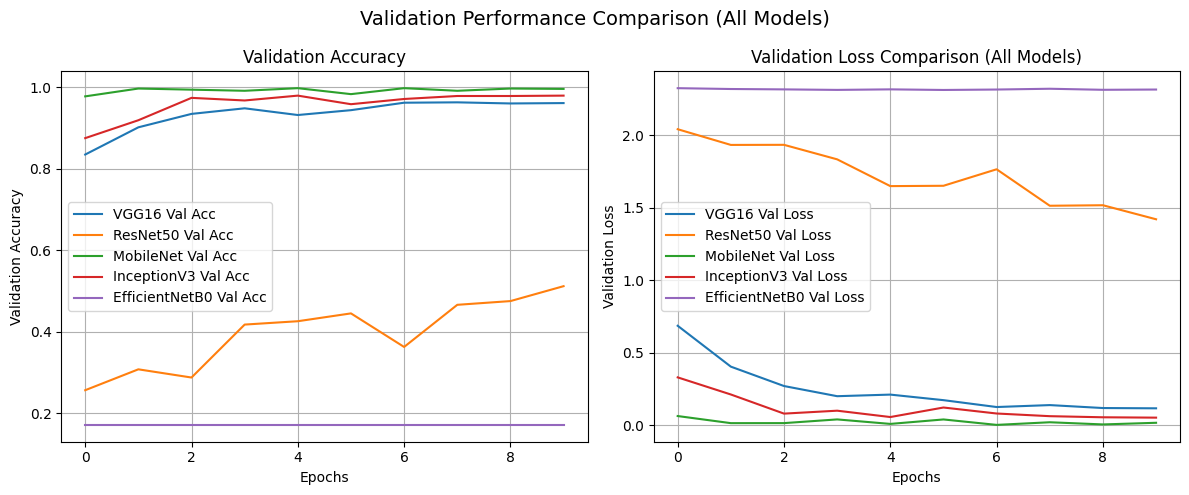

In [37]:
# --- Combined Validation Accuracy Plot ---
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for name, hist in histories.items():
  plt.plot(hist['val_accuracy'], label=f'{name} Val Acc')
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)

  # --- Combined Validation Loss Plot ---
plt.subplot(1,2,2)
for name, hist in histories.items():
  plt.plot(hist['val_loss'], label=f'{name} Val Loss')
plt.title("Validation Loss Comparison (All Models)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)

plt.suptitle("Validation Performance Comparison (All Models)", fontsize=14)
plt.tight_layout()
plt.show()


In [30]:
best_model_name = df_results.iloc[0]['Model']
print(f"⭐ Best Model: {best_model_name}")

# Rename best model for deployment
import shutil
shutil.copyfile(f"/content/{best_model_name}_fish_model.h5", "/content/fish_best_model.h5")
print("✅ Saved fish_best_model.h5 (ready for Streamlit)")

⭐ Best Model: VGG16_FineTuned
✅ Saved fish_best_model.h5 (ready for Streamlit)
